In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def find_max(data,thrs=0):
    x = data[:,0]
    y = data[:,1]
    Dy = y[1:]-y[:-1]
    DDy = Dy[1:] - Dy[:-1]
    xmax = []
    ymax = []
    for i in range(len(Dy)-1):
        if Dy[i]*Dy[i+1] <0:
            if DDy[i] <= 0 and y[i]>=thrs:
                xmax.append(x[i])
                ymax.append(y[i])
    return xmax, ymax

def clean(x,y, thrs=0):
    if thrs==0: thrs=np.mean(x)/2
    xcopy = x.copy()
    ycopy = y.copy()
    erase = []
    c = 0
    for i in range(len(x)-1):
        if x[i+1]-x[i] < thrs:
            c += 1
    for i in range(len(x)-c):
        if xcopy[i+1]-xcopy[i] < thrs:
            if ycopy[i+1] < ycopy[i]:
                xcopy.pop(i+1)
                ycopy.pop(i+1)
            else:
                xcopy.pop(i)
                ycopy.pop(i)
                i += -1
    return xcopy, ycopy


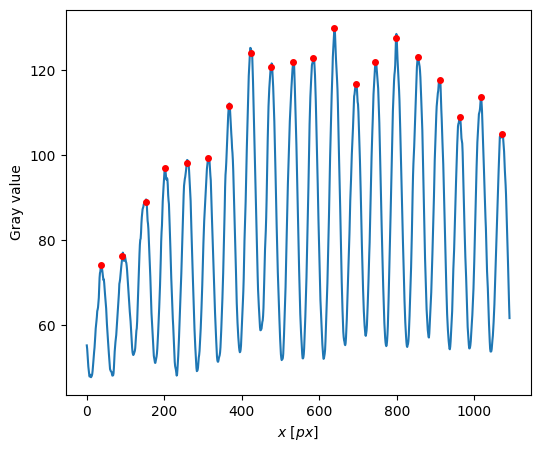

In [107]:
## Im5 - Franjas verticales

data_im5 = np.loadtxt('data_im5.csv',comments='#', delimiter=',')
xmax, ymax = find_max(data_im5,60)
xmax, ymax = clean(xmax,ymax,thrs=10)
xmax.pop(-2)
ymax.pop(-2)
plt.figure(figsize=(6,5))
plt.plot(data_im5[:,0],data_im5[:,1])
plt.plot(xmax,ymax,'or',ms=4)
plt.xlabel(r'$x$ [$px$]')
plt.ylabel('Gray value')
plt.show()

In [110]:
np.round(10.55565,3)

10.556

In [116]:
for i in range(len(xmax)-1):
    print( xmax[i+1]-xmax[i], '   &',np.round((xmax[i+1]-xmax[i])*5.3,2),'  \\\\')

55.0    & 291.5   \\
60.0    & 318.0   \\
49.0    & 259.7   \\
57.0    & 302.1   \\
56.0    & 296.8   \\
53.0    & 280.9   \\
58.0    & 307.4   \\
51.0    & 270.3   \\
57.0    & 302.1   \\
52.0    & 275.6   \\
54.0    & 286.2   \\
56.0    & 296.8   \\
50.0    & 265.0   \\
53.0    & 280.9   \\
56.0    & 296.8   \\
57.0    & 302.1   \\
51.0    & 270.3   \\
55.0    & 291.5   \\
55.0    & 291.5   \\


## **Apendice**

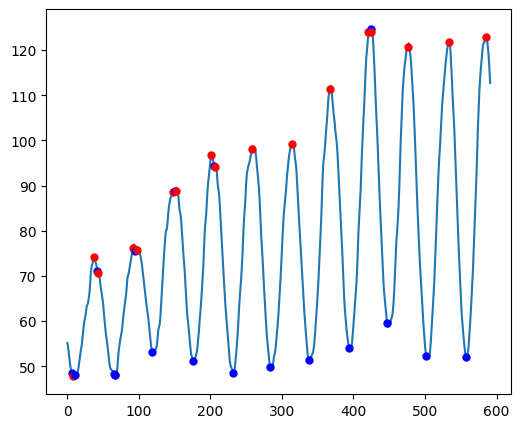

In [49]:
data_im5 = np.loadtxt('data_im5.csv',comments='#', delimiter=',')
x = data_im5[:-500,0]
y = data_im5[:-500,1]
Dy = y[1:] - y[:-1]
DDy = Dy[1:] - Dy[:-1]
plt.figure(figsize=(6,5))
plt.plot(data_im5[:-500,0],data_im5[:-500,1])
for i in range(len(Dy)-2):
    if Dy[i]*Dy[i+1] <0:
        if DDy[i] >0:
            plt.plot(x[i],y[i],'ob',ms=5)
        else:
            plt.plot(x[i],y[i],'or',ms=5)

In [38]:
DDy[4:14]

array([ 0.1751,  0.0496,  0.8022,  0.2018, -0.4721, -0.2745,  0.5946,
        0.0217,  0.194 ,  0.3776])